* Auto ML: 자동화 된 기계 학습은 기계 학습을 실제 문제에 적용하는 프로세스를 자동화하는 프로세스 (출처: 위키백과)

* Original Tutorial: 
https://www.pycaret.org/tutorials/html/CLF101.html
https://pycaret.readthedocs.io/en/stable/api/classification.html

In [1]:
# 라이브러리 설치 
# !pip install pycaret

## 1. Pycaret을 활용한 Machine Learning

In [2]:
from pycaret.classification import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# titanic data로 실습
titanic_df = pd.read_csv("titanic_modified.csv")

model = setup(data=titanic_df, 
              target='Survived', # y data 지정 
              train_size=0.7, # train data:test data = 7:3 split
              session_id=9) # Random seed 

# 11	Transformed Train Set	(623, 18) : Training data (70% 할당됨)
# 12	Transformed Test Set	(268, 18) : Test data (30% 할당됨)

,Description,Value
0,Session id,9
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 9)"
4,Transformed data shape,"(891, 9)"
5,Transformed train set shape,"(623, 9)"
6,Transformed test set shape,"(268, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [9]:
# 만들 수 있는 model list 
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


#### 1-1) 직접 모델 지정 가능

In [11]:
svm = create_model('svm') # creates a model and scores it using stratified cross validation (가능한 모델estimator 리스트는 docstring 참고)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.0000,0.7083,0.7727,0.7391,0.5896,0.5910
1,0.7778,0.0000,0.5000,0.8571,0.6316,0.4878,0.5241
2,0.6667,0.0000,0.3750,0.6000,0.4615,0.2383,0.2522
3,0.7581,0.0000,0.6250,0.7143,0.6667,0.4781,0.4807
4,0.7097,0.0000,0.7917,0.5938,0.6786,0.4236,0.4382
5,0.7742,0.0000,0.4167,1.0000,0.5882,0.4668,0.5518
6,0.8387,0.0000,0.7917,0.7917,0.7917,0.6601,0.6601
7,0.3871,0.0000,0.9583,0.3833,0.5476,-0.0120,-0.0423
8,0.8226,0.0000,0.7083,0.8095,0.7556,0.6173,0.6207


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
svm_tuned = tune_model(svm, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.0000,0.7083,0.7391,0.7234,0.5590,0.5593
1,0.8571,0.0000,0.8333,0.8000,0.8163,0.6995,0.6999
2,0.6508,0.0000,0.4583,0.5500,0.5000,0.2351,0.2374
3,0.8226,0.0000,0.7500,0.7826,0.7660,0.6232,0.6236
4,0.7581,0.0000,0.6667,0.6957,0.6809,0.4862,0.4865
5,0.7581,0.0000,0.7083,0.6800,0.6939,0.4940,0.4943
6,0.8226,0.0000,0.6667,0.8421,0.7442,0.6112,0.6209
7,0.8226,0.0000,0.6667,0.8421,0.7442,0.6112,0.6209
8,0.8387,0.0000,0.7083,0.8500,0.7727,0.6493,0.6558


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


#### 1-2) 자동으로 여러 모델 간 성능 비교

In [13]:
# # 아래 cell 에서 compare_models 함수 실행 시, 
# # 활용하는 데이터의 상태에 따라 [ AttributeError: 'str' object has no attribute 'decode' ] 에러 발생 가능
# # 이 경우에는 아래 코드를 대신 실행하여 비교 대상이 되는 모델 리스트에서 Logistic Regression 모델을 제외시켜 볼 것 

# top_3_models = compare_models(exclude=['lr'], 
#                               sort='Accuracy', # Other options are 'AUC', 'Recall', 'Precision', 'F1', 'Kappa' and 'MCC'
#                               n_select = 3) # Select top n models 

In [14]:
top_3_models = compare_models(sort='Accuracy', # Other options are 'AUC', 'Recall', 'Precision', 'F1', 'Kappa' and 'MCC'
                              n_select = 3) # Select top n models 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8154,0.8757,0.6982,0.7967,0.7415,0.5994,0.6049,0.1380
qda,Quadratic Discriminant Analysis,0.8091,0.8496,0.7571,0.7483,0.7517,0.5967,0.5977,0.1240
ada,Ada Boost Classifier,0.8091,0.8623,0.7404,0.7624,0.7491,0.5952,0.5977,0.1360
rf,Random Forest Classifier,0.8058,0.8583,0.6982,0.7778,0.7312,0.5806,0.5866,0.1710
nb,Naive Bayes,0.8026,0.8363,0.7277,0.7542,0.7389,0.5805,0.5826,0.1210
lightgbm,Light Gradient Boosting Machine,0.8026,0.8651,0.6982,0.7697,0.7281,0.5744,0.5796,0.2230
et,Extra Trees Classifier,0.7930,0.8428,0.6397,0.7870,0.7032,0.5470,0.5560,0.1680
lr,Logistic Regression,0.7914,0.8513,0.6940,0.7477,0.7173,0.5526,0.5559,0.1220
knn,K Neighbors Classifier,0.7882,0.8233,0.6442,0.7701,0.6996,0.5382,0.5451,0.1220
ridge,Ridge Classifier,0.7882,0.0000,0.6859,0.7448,0.7121,0.5452,0.5482,0.1180


Processing:   0%|          | 0/63 [00:00<?, ?it/s]

#### 1-3) 원하는 모델 Index로 가져오기 및 시각화

In [15]:
top_3_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=9, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=9)]

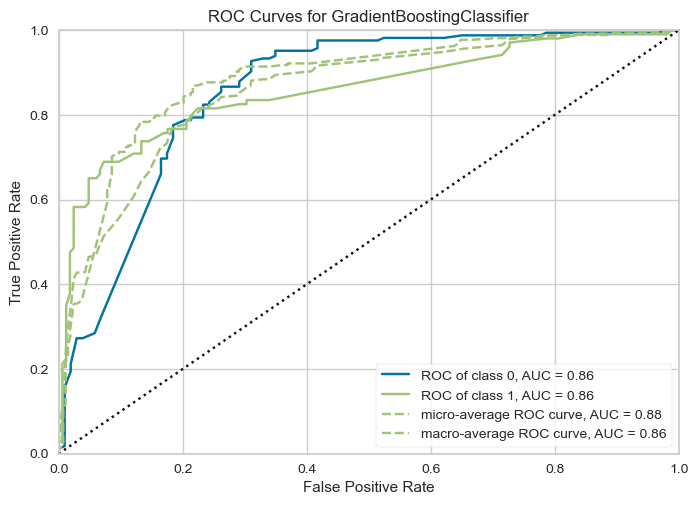

In [23]:
plot_model(top_3_models[0],
          plot = 'auc',
          scale = 1, # figure scale
          save = False, # Ture일 경우 working dir에 저장됨
          verbose = True)

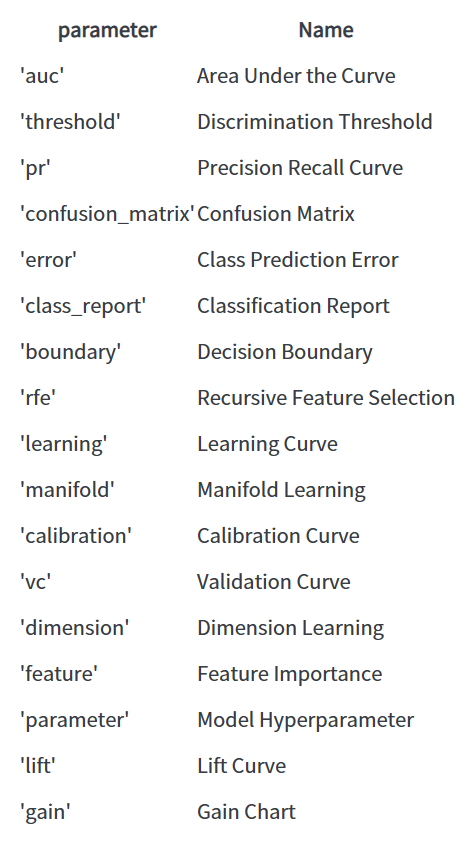

> 제공되는 plot 종류 
- 출처 : https://leo-bb.tistory.com/62

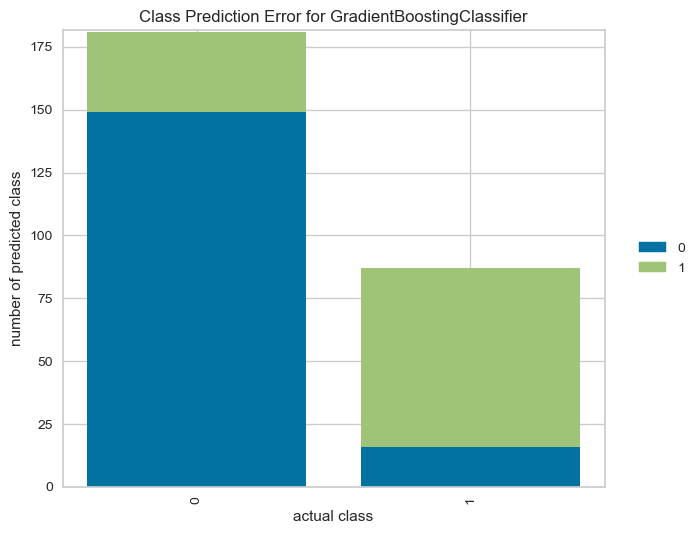

In [45]:
# 모델 시각화(plot)_plot = 'error'

plot_model(top_3_models[0], plot='error')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

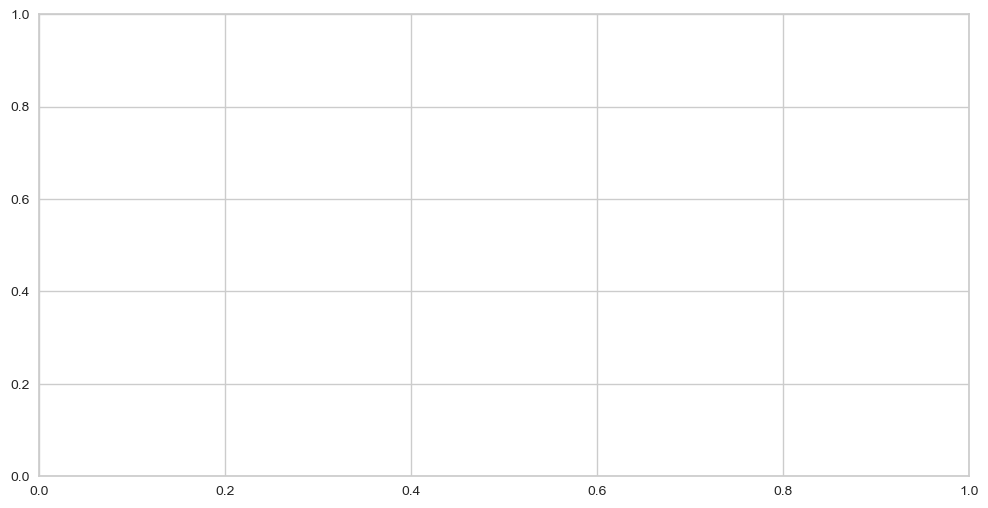

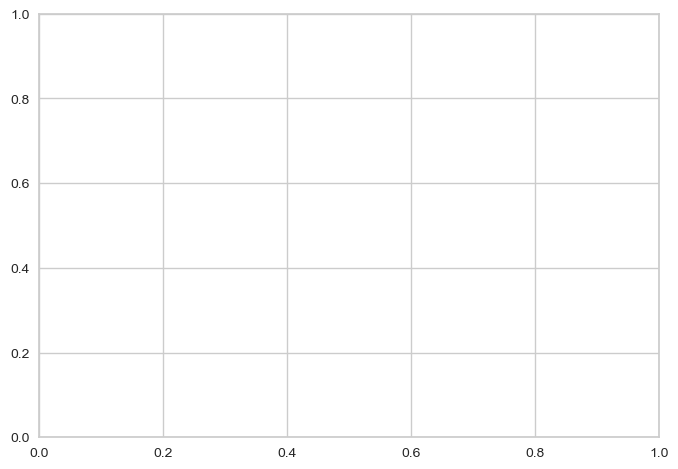

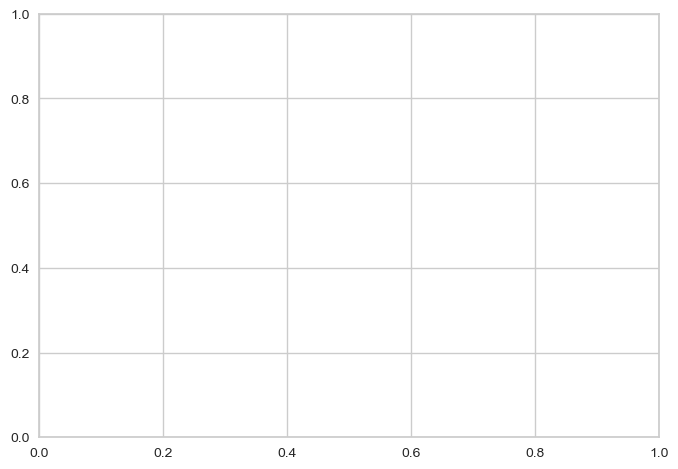

In [49]:
evaluate_model(top_3_models[0]) # 설정된 Hyper-params의 값, AUC/Confusion matrix 등 성능 지표, Feature importance 등을 바로 확인할 수 있음

**참조**:
- https://dsbook.tistory.com/360
- https://abluesnake.tistory.com/m/134
- https://abluesnake.tistory.com/m/134
- https://today-1.tistory.com/17
- https://leo-bb.tistory.com/62